<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **SpaceX  Falcon 9 First Stage Landing Prediction**


## Assignment: Exploring and Preparing Data


Estimated time needed: **70** minutes


In this assignment, we will predict if the Falcon 9 first stage will land successfully. SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is due to the fact that SpaceX can reuse the first stage.

In this lab, you will perform Exploratory Data Analysis and Feature Engineering.


Falcon 9 first stage will land successfully


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planned. Space X performs a controlled landing in the oceans.


## Objectives

Perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`

*   Exploratory Data Analysis
*   Preparing Data  Feature Engineering


### Import Libraries and Define Auxiliary Functions


We will import the following libraries the lab


In [1]:
import piplite
await piplite.install(['numpy'])
await piplite.install(['pandas'])
await piplite.install(['seaborn'])

In [2]:
# pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

In [3]:
## Exploratory Data Analysis

First, let's read the SpaceX dataset into a Pandas dataframe and print its summary


In [4]:
from js import fetch
import io

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp = await fetch(URL)
dataset_part_2_csv = io.BytesIO((await resp.arrayBuffer()).to_py())
df=pd.read_csv(dataset_part_2_csv)
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.

We can plot out the <code>FlightNumber</code> vs. <code>PayloadMass</code>and overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return.


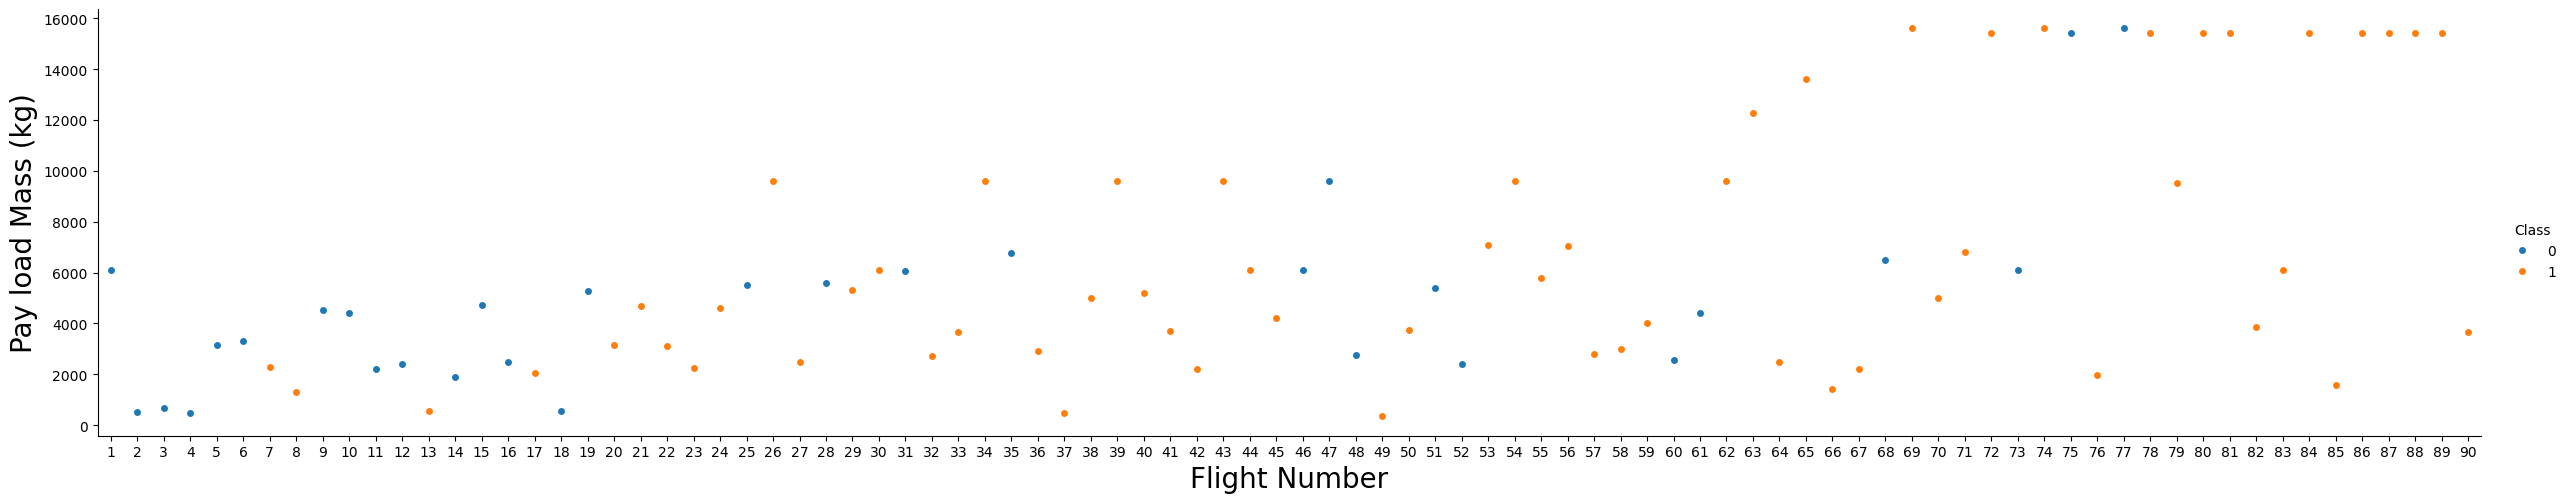

In [5]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

We see that different launch sites have different success rates.  <code>CCAFS LC-40</code>, has a success rate of 60 %, while  <code>KSC LC-39A</code> and <code>VAFB SLC 4E</code> has a success rate of 77%.


<function matplotlib.pyplot.show(close=None, block=None)>

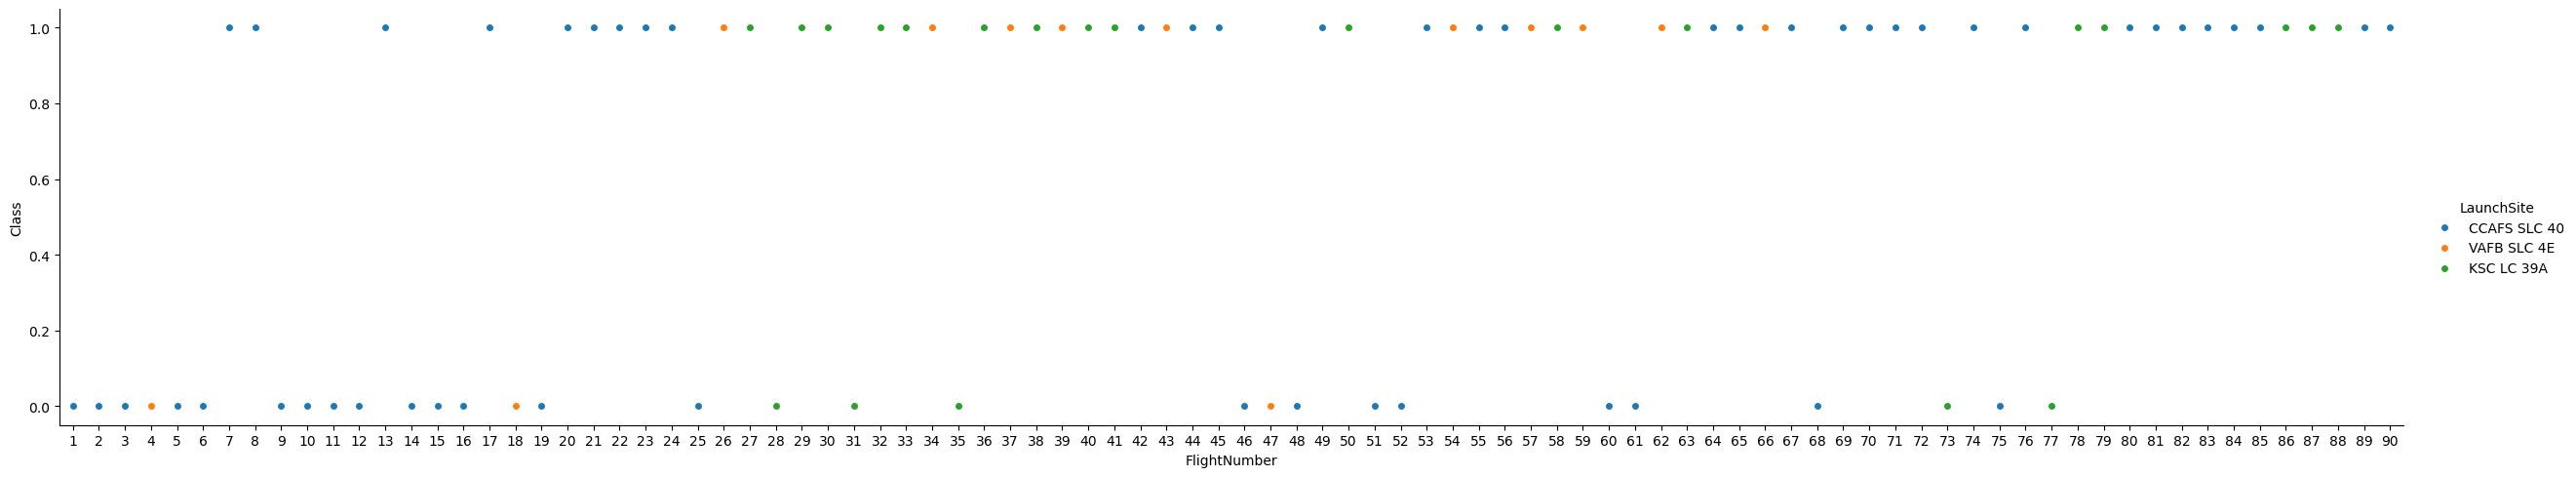

In [6]:
sns.catplot(hue=df["LaunchSite"], x=df["FlightNumber"], y=df["Class"], data=df, aspect=5)
plt.show

Next, let's drill down to each site visualize its detailed launch records.


### TASK 1: Visualize the relationship between Flight Number and Launch Site

First using a bar chart to see the count distribution of the class in the different launchsites

Class          0   1
LaunchSite          
CCAFS SLC 40  22  33
KSC LC 39A     5  17
VAFB SLC 4E    3  10




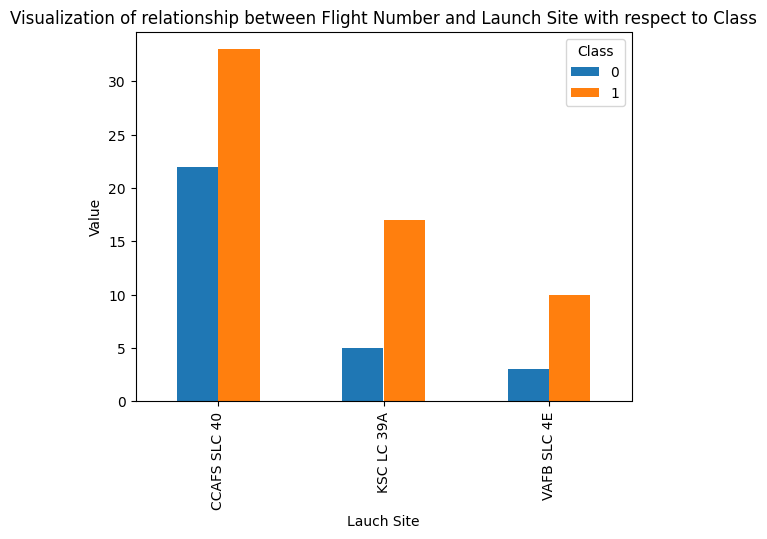

In [8]:
barFNaLS = df.groupby('LaunchSite')['Class'].value_counts().unstack()
print(barFNaLS)
print("\n")
barFNaLS.plot(kind='bar', stacked=False)
plt.xlabel('Lauch Site')
plt.ylabel('Value')
plt.title('Visualization of relationship between Flight Number and Launch Site with respect to Class')
plt.legend(title='Class')
plt.show()

Use the function <code>catplot</code> to plot <code>FlightNumber</code> vs <code>LaunchSite</code>, set the  parameter <code>x</code>  parameter to <code>FlightNumber</code>,set the  <code>y</code> to <code>Launch Site</code> and set the parameter <code>hue</code> to <code>'class'</code>


#### Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1200x1000 with 0 Axes>

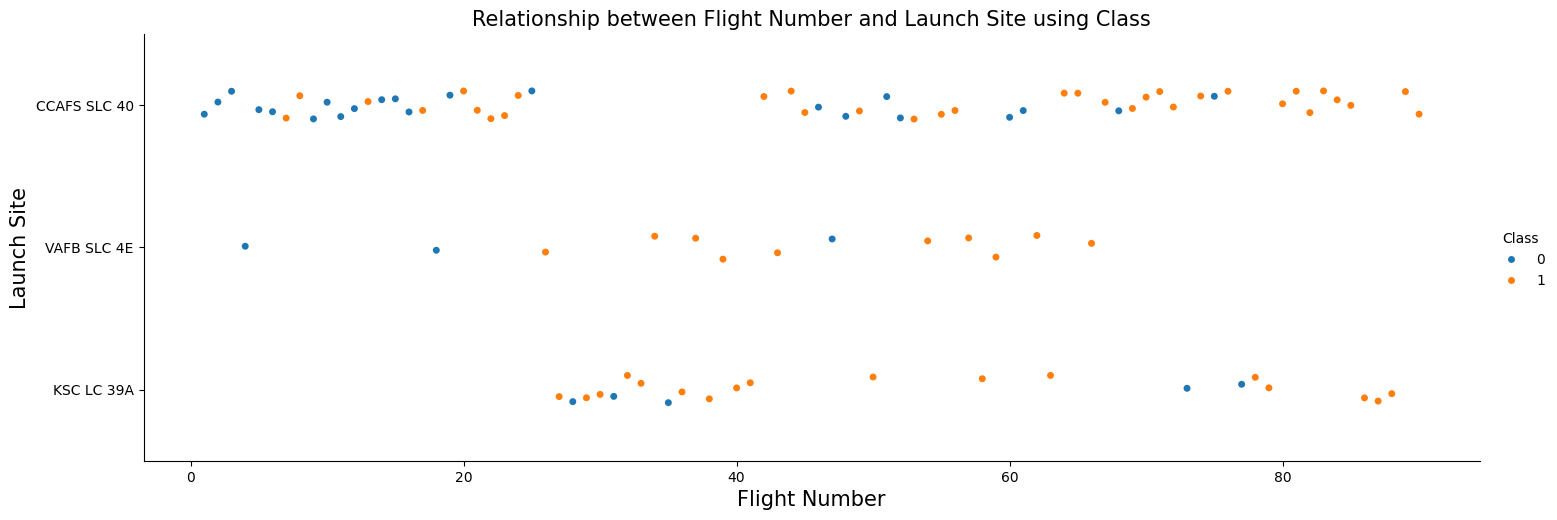

In [9]:
plt.figure(figsize=(12, 10)) 
sns.catplot(x=df["FlightNumber"], y=df["LaunchSite"], hue=df["Class"], data=df, aspect=3)
plt.xlabel("Flight Number", fontsize=15)
plt.ylabel("Launch Site", fontsize=15)
plt.title("Relationship between Flight Number and Launch Site using Class", fontsize=15)
plt.show

Now try to explain the patterns you found in the Flight Number vs. Launch Site scatter point plots.


##### Observation: ​Most of the missions with higher flight numbers that successfully landed are from site CCAFS SLC 40. ​It was observed that KSC LC 39A had no records for flight number below 27. ​VAFB SLC 4E had no records of flight number after 66 and CCAFS SLC 40 had no record between flight numbers 26 to 41. ​A majority of the launches with landing outcome occurred from site CCAFS SLC 40.

In [11]:
# Getting the total number of instances for each launch site with class 1
total_instances = barFNaLS.sum(axis=1)
percentage_class_1 = ((barFNaLS[1] / total_instances) * 100).round(2)
print("Percentage of Class 1 for each launch site:")
print(percentage_class_1)
print("\n")

# Getting the total number of instances for each launch site with class 0
total_instances = barFNaLS.sum(axis=1)
percentage_class_0 = ((barFNaLS[0] / total_instances) * 100).round(2)
print("Percentage of Class 0 for each launch site:")
print(percentage_class_0)

Percentage of Class 1 for each launch site:
LaunchSite
CCAFS SLC 40    60.00
KSC LC 39A      77.27
VAFB SLC 4E     76.92
dtype: float64


Percentage of Class 0 for each launch site:
LaunchSite
CCAFS SLC 40    40.00
KSC LC 39A      22.73
VAFB SLC 4E     23.08
dtype: float64


#### It was observed that total rockets launched from site KSC LC 39A had the most success with respect to landing per site with an approximate success rate of 77.27% then VAFB SLC 4E with a rate of 76.92% and CCAFS SLC 40 with a rate of 60%. Although it is worthy of note that more than 4 times the amount of rocket launches and 2.5 times the amount of rockets lauches occured from site CCAFS SLC 40 in comparison to VAFB SLC 4E and KSC LC 39A respectively

### TASK 2: Visualize the relationship between Payload and Launch Site

We also want to observe if there is any relationship between launch sites and their payload mass.


Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1000x800 with 0 Axes>

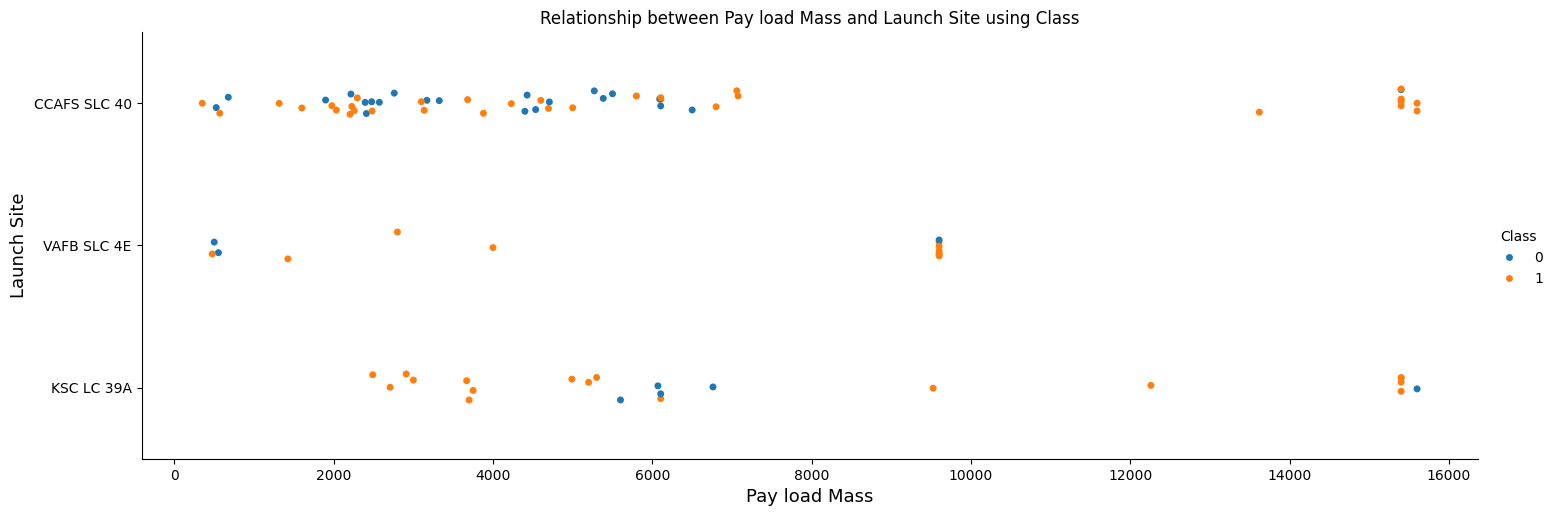

In [12]:
plt.figure(figsize=(10, 8))
sns.catplot(x=df["PayloadMass"], y=df["LaunchSite"], hue=df["Class"], data=df, aspect=3)
plt.xlabel("Pay load Mass", fontsize=13)
plt.ylabel("Launch Site", fontsize=13)
plt.title("Relationship between Pay load Mass and Launch Site using Class")
plt.show

Now if you observe Payload Vs. Launch Site scatter point chart you will find for the VAFB-SLC  launchsite there are no  rockets  launched for  heavypayload mass(greater than 10000).


##### Observation: Majority of the vessels from all sites had a payload mass range of 500 to 7000. ​For the VAFB-SLC launch site there are no records of rockets launched nor their outcome with heavy payload mass (greater than 10000). ​Majority of rockets launched with payload mass greater than 10000, are from site CCAFS SLC 40 and had a higher success rate than launches from site KSC LC 39A. 

### TASK  3: Visualize the relationship between success rate of each orbit type

Next, we want to visually check if there are any relationship between success rate and orbit type.


Let's create a `bar chart` for the sucess rate of each orbit


In [13]:
# grouped_df2 = df.groupby("Orbit")["Class"].value_counts().unstack().fillna(0)
# grouped_df2.plot(kind="bar", stacked = False)

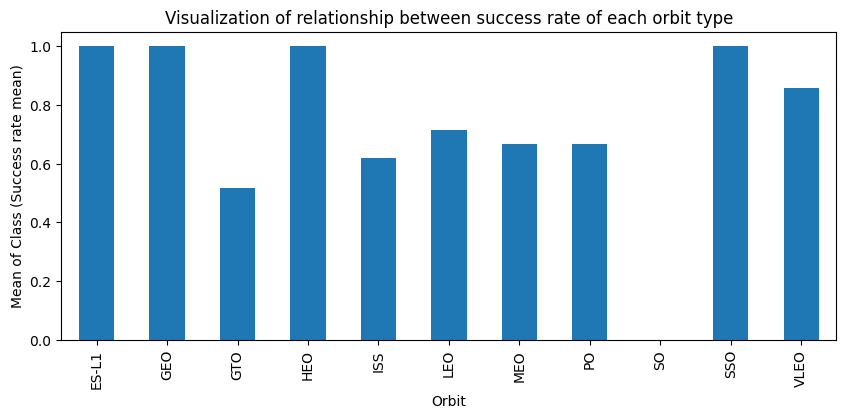

In [14]:
# HINT use groupby method on Orbit column and get the mean of Class column
grouped_df2 = df.groupby("Orbit")["Class"].mean()
plt.figure(figsize=(10, 4))
grouped_df2.plot(kind="bar")
plt.xlabel("Orbit")
plt.ylabel("Mean of Class (Success rate mean)")
plt.title("Visualization of relationship between success rate of each orbit type")
plt.show()

Analyze the ploted bar chart try to find which orbits have high sucess rate.


##### Observation: It was observed that the orbits type with the highest average success rate of 1 are; ES-L1, GEO, HEO and SSO. ​SO has the lowest average success rate.  

### TASK  4: Visualize the relationship between FlightNumber and Orbit type

Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value

<Figure size 800x600 with 0 Axes>

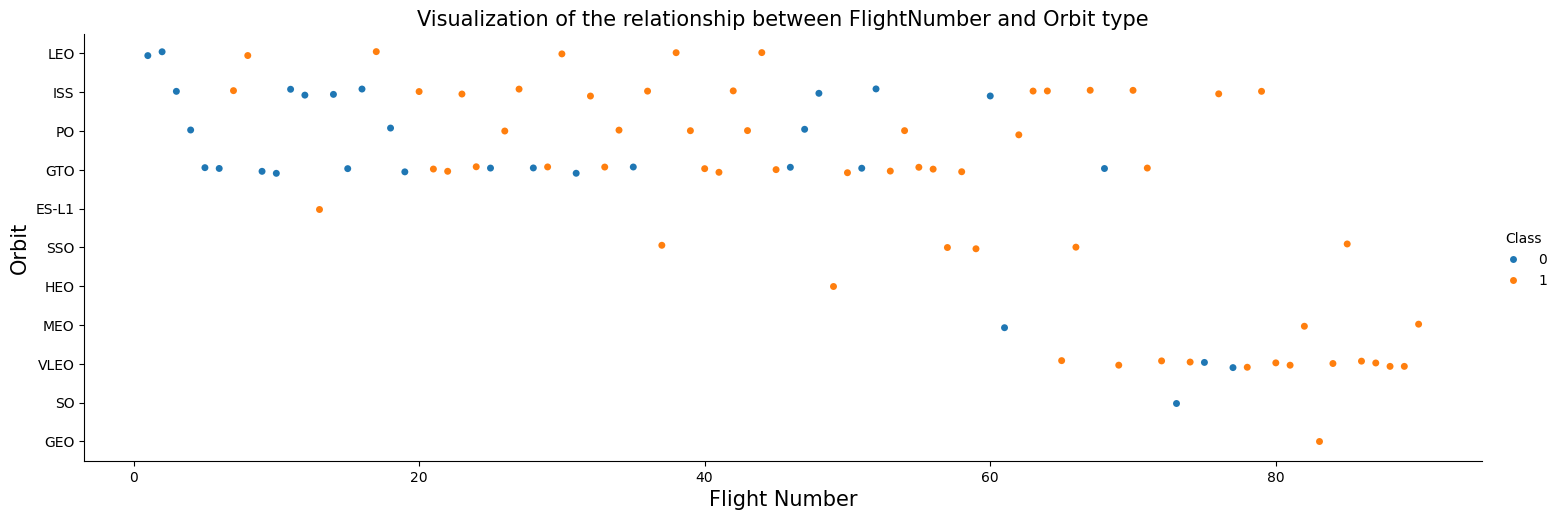

In [15]:
plt.figure(figsize=(8, 6))
sns.catplot(x = df["FlightNumber"], y = df["Orbit"], hue = df["Class"], data = df, aspect=3)
plt.xlabel("Flight Number", fontsize = 15) 
plt.ylabel("Orbit", fontsize = 15)
plt.title("Visualization of the relationship between FlightNumber and Orbit type", fontsize = 15)
plt.show()

For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.


You should see that in the LEO orbit the Success appears related to the number of flights; on the other hand, there seems to be no relationship between flight number when in GTO orbit.


##### Observation: It was observed that in the LEO orbit, the success appears related to the number of flights. ​The orbit with the greatest number of success for higher flight numbers (from 80 and greater) is VLEO. ​GTO had the highest amount of launches. But its success rate is not related to the increase or decrease in flight number.

### TASK  5: Visualize the relationship between Payload and Orbit type

Using a bar chart with mean of payload mass:

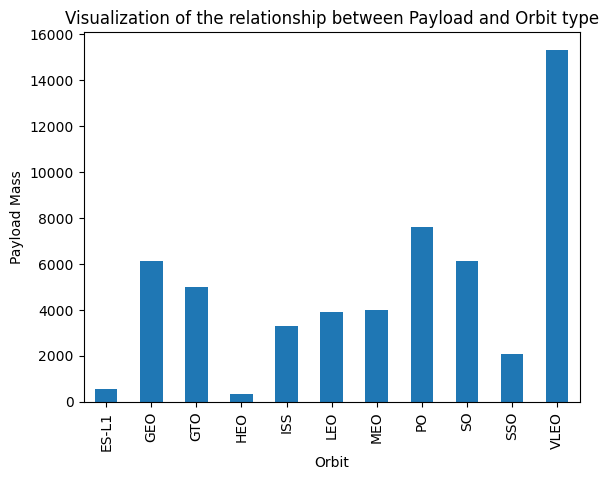

In [16]:
barPaO_df3 = df.groupby("Orbit")["PayloadMass"].mean()
barPaO_df3.plot(kind="bar")
plt.xlabel("Orbit") 
plt.ylabel("Payload Mass") 
plt.title("Visualization of the relationship between Payload and Orbit type")
plt.show()

##### The bar chart we see VLEO orbit has the highest payload mean and HEO has the lowest payload mean. 

Plot a scatter point chart with x axis to be Payload and y axis to be the Orbit, and hue to be the class value

<Figure size 800x800 with 0 Axes>

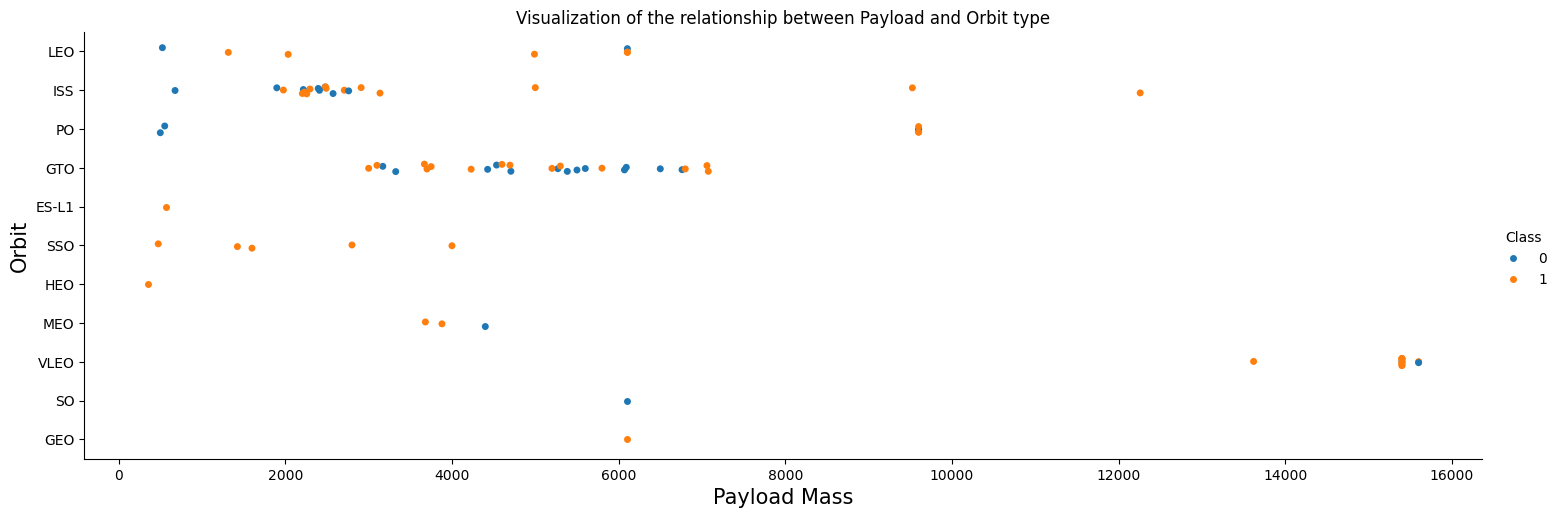

In [17]:
plt.figure(figsize=(8, 8))
sns.catplot(x = df["PayloadMass"], y = df["Orbit"], hue = df["Class"], data = df, aspect=3)
plt.xlabel("Payload Mass", fontsize = 15) 
plt.ylabel("Orbit", fontsize = 15) 
plt.title("Visualization of the relationship between Payload and Orbit type")
plt.show()

Similarly, we can plot the Payload vs. Orbit scatter point charts to reveal the relationship between Payload and Orbit type


##### Observation: It was observed that orbit GTO and ISS had the most flights with different payloads. ​ISS and PO success rate seemed to have a relationship with increased payload mass.​ SSO is a low payload mass orbit. ​SSO had all successful outcomes.

With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.

However for GTO we cannot distinguish this well as both positive landing rate and negative landing(unsuccessful mission) are both there here.

### TASK  6: Visualize the launch success yearly trend

You can plot a line chart with x axis to be <code>Year</code> and y axis to be average success rate, to get the average launch success trend.


The function will help you get the year from the date:


In [18]:
# A function to Extract years from the date 
year=[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()
df['Date'] = year
df.head()
    

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


Plot a line chart with x axis to be the extracted year and y axis to be the success rate

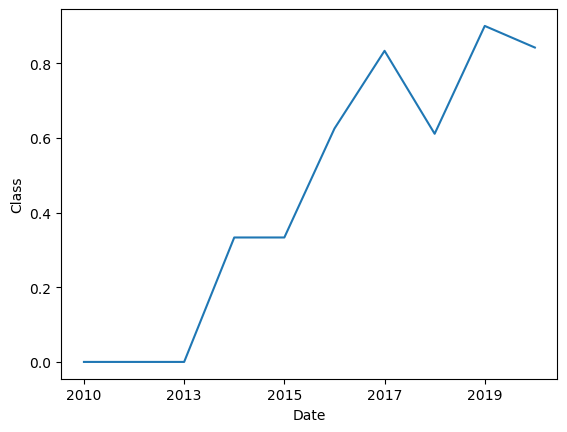

In [19]:
## Features Engineering
grouped_df4 = df.groupby("Date")["Class"].mean()
grouped_df4.plot(kind="line")
plt.xlabel("Date")
plt.ylabel("Class")
plt.show()

##### Observation: An increase in landing outcome success rate was first recorded in 2013. ​The second increase was recorded in 2015 after which it experienced a decline.​The first decline in success rate was recorded in 2017.​ The second decline was experienced in 2019.​
##### From 2010 to 2019 the success rate has generally increased. 

you can observe that the sucess rate since 2013 kept increasing till 2020


By now, you should obtain some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future module.


In [20]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


### TASK  7: Create dummy variables to categorical columns

In [21]:
# HINT: Use get_dummies() function on the categorical columns
pd.set_option('display.max_columns', False)
features_one_hot = pd.get_dummies(features, ['Orbits', 'LaunchSite', 'LandingPad', 'Serial'])
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbits_ES-L1,Orbits_GEO,Orbits_GTO,Orbits_HEO,Orbits_ISS,Orbits_LEO,Orbits_MEO,Orbits_PO,Orbits_SO,Orbits_SSO,Orbits_VLEO,LaunchSite_CCAFS SLC 40,LaunchSite_KSC LC 39A,LaunchSite_VAFB SLC 4E,LandingPad_5e9e3032383ecb267a34e7c7,LandingPad_5e9e3032383ecb554034e7c9,LandingPad_5e9e3032383ecb6bb234e7ca,LandingPad_5e9e3032383ecb761634e7cb,LandingPad_5e9e3033383ecbb9e534e7cc,Serial_B0003,Serial_B0005,Serial_B0007,Serial_B1003,Serial_B1004,Serial_B1005,Serial_B1006,Serial_B1007,Serial_B1008,Serial_B1010,Serial_B1011,Serial_B1012,Serial_B1013,Serial_B1015,Serial_B1016,Serial_B1017,Serial_B1018,Serial_B1019,Serial_B1020,Serial_B1021,Serial_B1022,Serial_B1023,Serial_B1025,Serial_B1026,Serial_B1028,Serial_B1029,Serial_B1030,Serial_B1031,Serial_B1032,Serial_B1034,Serial_B1035,Serial_B1036,Serial_B1037,Serial_B1038,Serial_B1039,Serial_B1040,Serial_B1041,Serial_B1042,Serial_B1043,Serial_B1044,Serial_B1045,Serial_B1046,Serial_B1047,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,525.000000,1,False,False,False,1.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,677.000000,1,False,False,False,1.0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,500.000000,1,False,False,False,1.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,3170.000000,1,False,False,False,1.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Use the function <code>get_dummies</code> and <code>features</code> dataframe to apply OneHotEncoder to the column <code>Orbits</code>, <code>LaunchSite</code>, <code>LandingPad</code>, and <code>Serial</code>. Assign the value to the variable <code>features_one_hot</code>, display the results using the method head. Your result dataframe must include all features including the encoded ones.


### TASK  8: Cast all numeric columns to `float64`

Display the datatypes of all columns by looping through the columns and appending the datatypes to an empty list

In [22]:
typedata = []
for x in features_one_hot.columns: 
    dtype = features_one_hot[x].dtype
    if dtype not in typedata:
        typedata.append(dtype) 
print(typedata)

[dtype('int64'), dtype('float64'), dtype('bool'), dtype('uint8')]


In [23]:
# features_one_hot2 = features_one_hot.copy()
# for x in features_one_hot.columns: 
#     if features_one_hot[x].dtype == "int64" or features_one_hot[x].dtype == "uint8": 
#         features_one_hot[x] = features_one_hot[x].astype(float) 
# print(features_one_hot.dtypes)

#### HINT: use astype function

In [24]:
features_one_hot = features_one_hot.astype(float)
features_one_hot.dtypes

FlightNumber    float64
PayloadMass     float64
Flights         float64
GridFins        float64
Reused          float64
                 ...   
Serial_B1056    float64
Serial_B1058    float64
Serial_B1059    float64
Serial_B1060    float64
Serial_B1062    float64
Length: 80, dtype: object

#### Confirm all datatypes are float64:

In [25]:
typedata2 = []
for x2 in features_one_hot.columns: 
    dtype = features_one_hot[x2].dtype
    if dtype not in typedata2:
        typedata2.append(dtype) 
print(typedata2)

[dtype('float64')]


Now that our <code>features_one_hot</code> dataframe only contains numbers cast the entire dataframe to variable type <code>float64</code>


#### Graded Quiz confirmations

In [26]:
spacex_df = df.copy() 
ndf1 = spacex_df[spacex_df["LaunchSite"] == "CCAFS SLC 40"]
ndf1.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
4,5,2013,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0
5,6,2014,Falcon 9,3325.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1005,-80.577366,28.561857,0


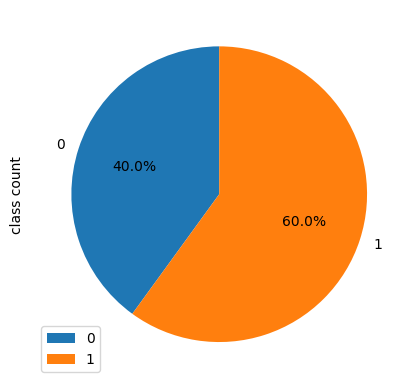

In [27]:
class_data = spacex_df[spacex_df['LaunchSite'] == "CCAFS SLC 40"].groupby(['LaunchSite', 'Class']).size().reset_index(name='class count')
class_data.plot(kind="pie", y='class count', labels=class_data['Class'], autopct='%1.1f%%', startangle=90)
plt.show()

In [28]:
filtered_df = spacex_df[spacex_df['LaunchSite']=="CCAFS SLC 40"].groupby(['LaunchSite', 'Class']).size().reset_index(name='class count')
filtered_df

,LaunchSite,Class,class count
0,CCAFS SLC 40,0,22
1,CCAFS SLC 40,1,33


In [29]:
filtered_df2 = spacex_df[spacex_df['LaunchSite']=="CCAFS SLC 40"]
filtered_df2.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
4,5,2013,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0
5,6,2014,Falcon 9,3325.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1005,-80.577366,28.561857,0


In [30]:
spacex_df["PayloadMass"].head()

0    6104.959412
1     525.000000
2     677.000000
3     500.000000
4    3170.000000
Name: PayloadMass, dtype: float64

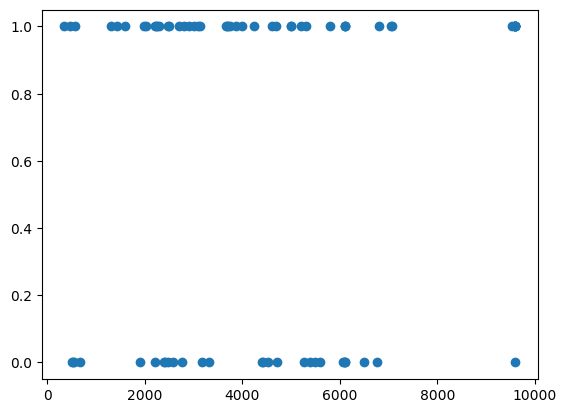

In [31]:
site = ["CCAFS SLC 40"]
launchSiteCheck =  [0, 10000]
def payload_check_site(site, launchSiteCheck):
    filtered_df2 = spacex_df[(spacex_df["PayloadMass"] > launchSiteCheck[0]) & (spacex_df["PayloadMass"] < launchSiteCheck[1])]
    return filtered_df2 

filtered_df2 = payload_check_site(site, launchSiteCheck)
plt.scatter(x=filtered_df2["PayloadMass"], y=filtered_df2["Class"])
plt.show()

In [32]:
spacex_df["Class"].head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

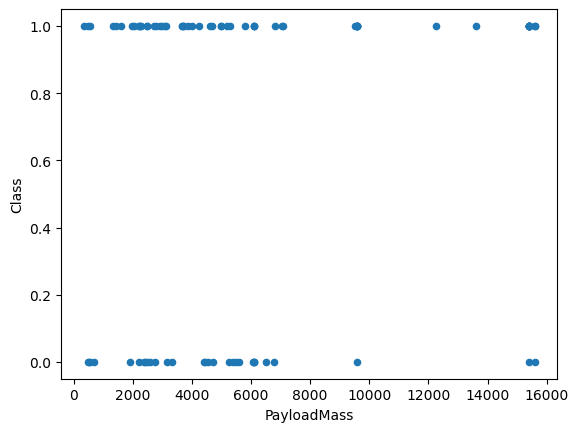

In [33]:
spacex_df.plot(kind="scatter", x="PayloadMass", y="Class")
plt.show()

We can now export it to a <b>CSV</b> for the next section,but to make the answers consistent, in the next lab we will provide data in a pre-selected date range.

<code>features_one_hot.to_csv('dataset_part\_3.csv', index=False)</code>

In [34]:
features_one_hot.to_csv('dataset_part_3.csv', index=False)

## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork865-2022-01-01)


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
